<a href="https://colab.research.google.com/github/elizabethyoo/team_9/blob/explore%2F02-eda-sbps/SBPS_surveylevel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/gdrive')
root_path = '/content/gdrive/MyDrive/DS4A/Group 9 Project Documents'

Mounted at /content/gdrive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = 15,10
import warnings
warnings.filterwarnings('ignore')

In [3]:
combo_df = pd.read_csv('/content/drive/MyDrive/DS4A/Group 9 Project Documents/Datasets/business_pulse/combined_state_sector.csv')

In [4]:
combo_df.head()

,ST,NAICS_SECTOR,INSTRUMENT_ID,QUESTION,ANSWER_ID,ANSWER_TEXT,ESTIMATE_PERCENTAGE,SE,DATE_START,DATE_END
0,-,-,1,"Overall, how has this business been affected b...",1,Large negative effect,51.4,0.21,2020-04-26,2020-05-02
1,-,-,1,"Overall, how has this business been affected b...",2,Moderate negative effect,38.5,0.27,2020-04-26,2020-05-02
2,-,-,1,"Overall, how has this business been affected b...",3,Little or no effect,7.6,0.29,2020-04-26,2020-05-02
3,-,-,1,"Overall, how has this business been affected b...",4,Moderate positive effect,1.7,0.08,2020-04-26,2020-05-02
4,-,-,1,"Overall, how has this business been affected b...",5,Large positive effect,0.8,0.06,2020-04-26,2020-05-02


In [15]:
combo_df.tail()

,ST,NAICS_SECTOR,INSTRUMENT_ID,QUESTION,ANSWER_ID,ANSWER_TEXT,ESTIMATE_PERCENTAGE,SE,DATE_START,DATE_END
911067,WY,-,7,"In the last week, did this business have a cha...",3,No change,76.5,3.93,2021-09-27,2021-10-03
911068,WY,-,8,"In the last week, did this business require em...",2,No,78.0,7.00,2021-09-27,2021-10-03
911069,WY,-,9,"In the last week, did this business require em...",2,No,75.5,8.02,2021-09-27,2021-10-03
911070,WY,62,13,Comparing now to what was normal before March ...,3,Little or no change in number of hours worked ...,100.0,0.00,2021-09-27,2021-10-03
911071,WY,62,5,"In the last week, did this business do any of ...",4,None of the above,100.0,0.00,2021-09-27,2021-10-03


In [5]:
combo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911072 entries, 0 to 911071
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ST                   911072 non-null  object 
 1   NAICS_SECTOR         911072 non-null  object 
 2   INSTRUMENT_ID        911072 non-null  int64  
 3   QUESTION             911072 non-null  object 
 4   ANSWER_ID            911072 non-null  int64  
 5   ANSWER_TEXT          911072 non-null  object 
 6   ESTIMATE_PERCENTAGE  911072 non-null  float64
 7   SE                   911072 non-null  float64
 8   DATE_START           911072 non-null  object 
 9   DATE_END             911072 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 69.5+ MB


In [16]:
Filter1 = (combo_df.ST != "-") 

In [18]:
combo_df_state = combo_df[Filter1]
combo_df_state.tail()

,ST,NAICS_SECTOR,INSTRUMENT_ID,QUESTION,ANSWER_ID,ANSWER_TEXT,ESTIMATE_PERCENTAGE,SE,DATE_START,DATE_END
911067,WY,-,7,"In the last week, did this business have a cha...",3,No change,76.5,3.93,2021-09-27,2021-10-03
911068,WY,-,8,"In the last week, did this business require em...",2,No,78.0,7.00,2021-09-27,2021-10-03
911069,WY,-,9,"In the last week, did this business require em...",2,No,75.5,8.02,2021-09-27,2021-10-03
911070,WY,62,13,Comparing now to what was normal before March ...,3,Little or no change in number of hours worked ...,100.0,0.00,2021-09-27,2021-10-03
911071,WY,62,5,"In the last week, did this business do any of ...",4,None of the above,100.0,0.00,2021-09-27,2021-10-03


In [19]:
combo_df_state

,ST,NAICS_SECTOR,INSTRUMENT_ID,QUESTION,ANSWER_ID,ANSWER_TEXT,ESTIMATE_PERCENTAGE,SE,DATE_START,DATE_END
1162,AK,-,1,"Overall, how has this business been affected b...",1,Large negative effect,45.4,5.28,2020-04-26,2020-05-02
1163,AK,-,1,"Overall, how has this business been affected b...",2,Moderate negative effect,44.0,5.06,2020-04-26,2020-05-02
1164,AK,-,10,How would you describe the current availabilit...,2,1-2 weeks of business operations,20.0,3.04,2020-04-26,2020-05-02
1165,AK,-,10,How would you describe the current availabilit...,3,3-4 weeks of business operations,11.9,2.41,2020-04-26,2020-05-02
1166,AK,-,10,How would you describe the current availabilit...,4,1-2 months of business operations,25.7,4.28,2020-04-26,2020-05-02
...,...,...,...,...,...,...,...,...,...,...
911067,WY,-,7,"In the last week, did this business have a cha...",3,No change,76.5,3.93,2021-09-27,2021-10-03
911068,WY,-,8,"In the last week, did this business require em...",2,No,78.0,7.00,2021-09-27,2021-10-03
911069,WY,-,9,"In the last week, did this business require em...",2,No,75.5,8.02,2021-09-27,2021-10-03
911070,WY,62,13,Comparing now to what was normal before March ...,3,Little or no change in number of hours worked ...,100.0,0.00,2021-09-27,2021-10-03


In [ ]:
combo_df_state[combo_df_state.QUESTION]

In [20]:
OverallFilter = combo_df_state.INSTRUMENT_ID == 1
Overall_state_df = combo_df_state[OverallFilter]

In [21]:
Overall_state_df

,ST,NAICS_SECTOR,INSTRUMENT_ID,QUESTION,ANSWER_ID,ANSWER_TEXT,ESTIMATE_PERCENTAGE,SE,DATE_START,DATE_END
1162,AK,-,1,"Overall, how has this business been affected b...",1,Large negative effect,45.4,5.28,2020-04-26,2020-05-02
1163,AK,-,1,"Overall, how has this business been affected b...",2,Moderate negative effect,44.0,5.06,2020-04-26,2020-05-02
1198,AK,72,1,"Overall, how has this business been affected b...",1,Large negative effect,91.0,9.19,2020-04-26,2020-05-02
1201,AL,-,1,"Overall, how has this business been affected b...",1,Large negative effect,40.6,4.18,2020-04-26,2020-05-02
1202,AL,-,1,"Overall, how has this business been affected b...",2,Moderate negative effect,41.9,2.88,2020-04-26,2020-05-02
...,...,...,...,...,...,...,...,...,...,...
121046,WV,-,1,"Overall, how has this business been affected b...",3,Little or no effect,20.2,3.46,2020-06-21,2020-06-27
121103,WY,-,1,"Overall, how has this business been affected b...",1,Large negative effect,28.6,6.33,2020-06-21,2020-06-27
121104,WY,-,1,"Overall, how has this business been affected b...",2,Moderate negative effect,53.7,7.08,2020-06-21,2020-06-27
121105,WY,-,1,"Overall, how has this business been affected b...",3,Little or no effect,15.7,3.74,2020-06-21,2020-06-27


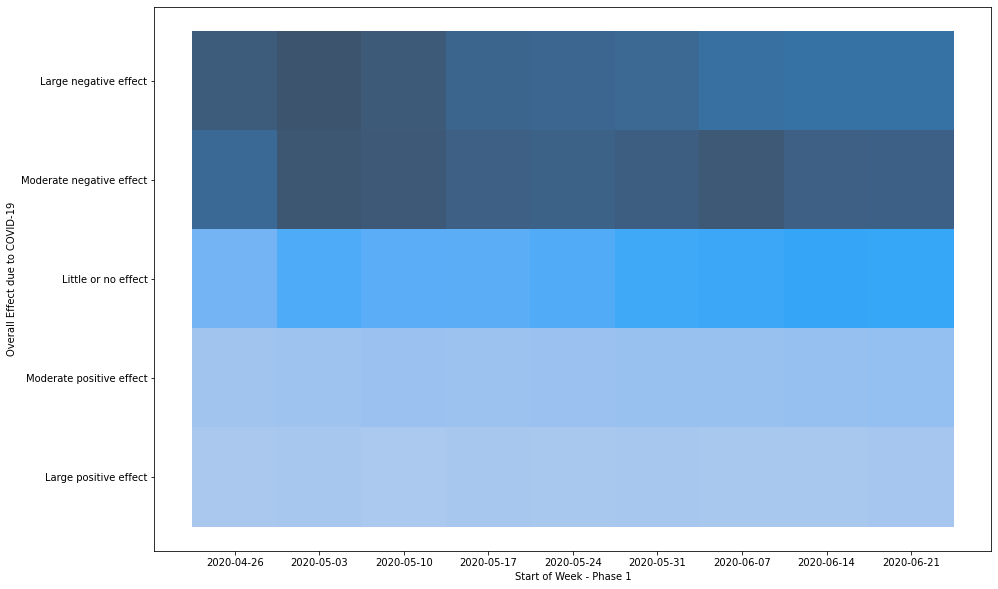

In [26]:
Overall = sns.histplot(data=Overall_state_df, x='DATE_START', y='ANSWER_TEXT', legend=True)
Overall.set(xlabel = 'Start of Week - Phase 1', ylabel = 'Overall Effect due to COVID-19')
Overall

In [ ]:
D